### 다른 회귀 모델

- 선형 회귀모델(Linear Regression Model), 릿지, 라쏘, 앙상블

- 선형회귀모델 

    - 단일회귀모델(독립변수가 하나인 것, 직선의 방정식)

    - 다항회귀모델(독립변수가 2개인 것, 곡선의 방정식)

    - 다중회귀모델(독립변수가 3개 이상인 것, 단일 회귀의 확장)

- 앙상블모델 : 랜덤포레스트, 엑스트라트리, 그레디언트부스트, 히스토그램 그레디언트부스트

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

### 단일 선형회귀모델 

- 모델 이름 : LinearRegression

In [2]:
### 농어 길이

perch_length = np.array(
                        [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                         21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                         22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                         27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                         36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                         40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
                         )
### 농어 무게 

perch_weight = np.array(
                        [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                         110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                         130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                         197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                         514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                         820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                         1000.0, 1000.0]
                         )

perch_length.shape, perch_weight.shape

((56,), (56,))

In [3]:
### 훈련:테스트  = 75:25 데이터 분류하기
# - stratify : 분류모델에서 종속변수의 범주형 데이터에 대한 편향을 줄이기 위한 속성으로 회귀모델에서는 연속형 데이터를 사용하기에 사용하지 않음
# train_test_split(독립변수, 종속변수, 분할비율, 랜덤규칙)
# --> 반환되는 값 4개 순서 : 훈련 독립, 테스트 독립, 훈련 종속, 테스트 종속

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, test_size=0.25, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [4]:
### 훈련 및 테스트의 독립변수를 2차원으로 변환하기
# - 변환하는 이유 : 머신러닝에서 훈련 시에는 2차원 독립변수를 사용한다.
# - 변수명 : train_input_2d, test_input_2d


# - reshape(행, 열) : 차원 변경 함수
# - reshape(-1, 1) : -1은 모든 행을 의미, 두번째 1은 1열을 의미. 즉, 전체 행에 대한 1열을 만드는 작업을 수행
train_input_2d = train_input.reshape(-1,1)

test_input_2d = test_input.reshape(-1,1)

print(train_input_2d.shape,test_input_2d.shape)

(42, 1) (14, 1)


In [5]:
### 데이터 확인하기
train_input_2d.shape, train_target.shape, test_input_2d.shape, test_target.shape

((42, 1), (42,), (14, 1), (14,))

In [6]:
### 모델 생성하기
# - 모델 변수명 : lr

lr = LinearRegression()

In [7]:
### 모델 훈련 시키기
lr.fit(train_input_2d,train_target)

LinearRegression()

In [8]:
### 훈련 및 테스트 정확도 확인하기
train_score = lr.score(train_input_2d,train_target)
test_score = lr.score(test_input_2d,test_target)

print(train_score, test_score)
print(train_score-test_score)

0.939846333997604 0.8247503123313558
0.11509602166624822


#### 해석

- 훈련 데이터의 0.94로 성능은 좋으나, 테스트 정확도가 0.825로 훈련 정확도와 0.12 정도의 차이를 보이고 있다.

- 따라서 과대적합을 의심할 수는 있음

In [9]:
### 임의 데이터 50cm로 예측하기
pred = lr.predict([[50]])
pred

array([1241.83860323])

In [10]:
### 시각화 시 한글 및 마이너스(-) 기호 사용을 위한 처리
# - 한글 처리 : 폰트 지정
plt.rcParams['font.family'] ='Malgun Gothic'

# - 마이너스(-) 기호 처
plt.rcParams['axes.unicode_minus'] =False

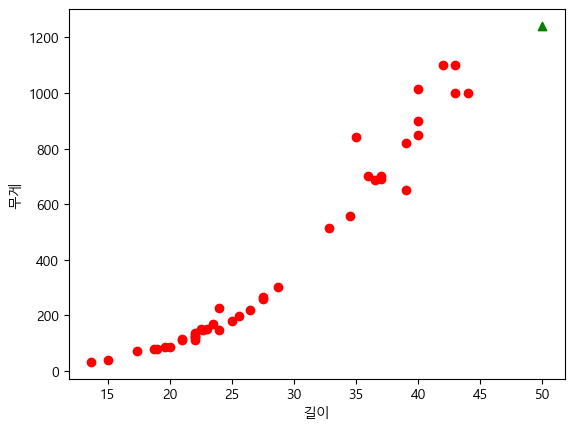

In [11]:
### 원본 데이터와 임의 데이터 산점도로 시각화하기

plt.scatter(train_input_2d,train_target,c='red', label='원본')
plt.scatter(50, pred[0], marker='^', c='green', label='임의 데이터')

plt.xlabel('길이')
plt.ylabel('무게')
plt.show();

### 추세선 그리기

- 추이선, 예측선, 추세선 모두 같은 의미의 용어로 사용된다.

- 우리가 분석할 때 추이 분석이라는 용어를 사용할 때 보통 추세선을 의미한다고 보면 된다.

- 예측 결과는 추세선 영역 안에서 모델이 예측을 수행한다.

- 모델이 훈련(fit)을 하게 되면 추세선, 즉 추이(패턴)을 찾기 위한 기준값을 추출한다.

- 기준값은 : 기울기와 y절편

- 단일 회귀 모델 = ax + b의 직선의 방정식을 사용함(a는 기울기, b는 y절편)

- 기울기와 절편을 이용하여 예측을 수행하며, 추세선이 그려진다.

In [12]:
### 추세선을 그리기 위해서 계수값(기울기와 y절편) 추출하기
# - 기울기 : coef_
# - y절편 : intercept_

a = lr.coef_
b = lr.intercept_

a,b

(array([39.01714496]), -709.0186449535477)

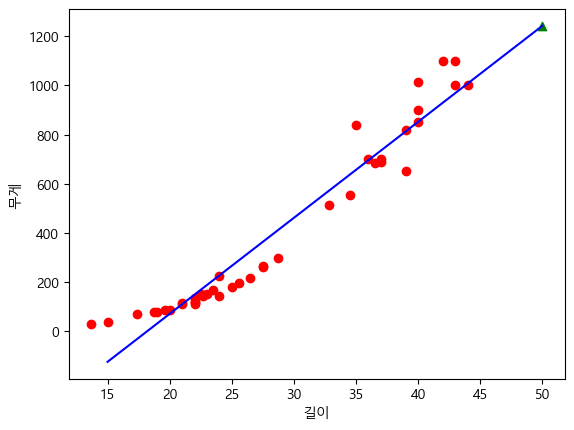

In [13]:
### 추세선 그리기
### 원본 데이터와 임의 데이터 산점도로 시각화하기
# - 원본
plt.scatter(train_input_2d,train_target,c='red', label='원본')
# - 임의 데이터
plt.scatter(50, pred[0], marker='^', c='green', label='임의 데이터')
# - 추세선(기울기, 절편)
plt.plot([15,50],[a*15+b,a*50 +b], c='blue')

plt.xlabel('길이')
plt.ylabel('무게')
plt.show();

In [14]:
(15,a*15+b),(50,a*50 +b)

((15, array([-123.7614705])), (50, array([1241.83860323])))

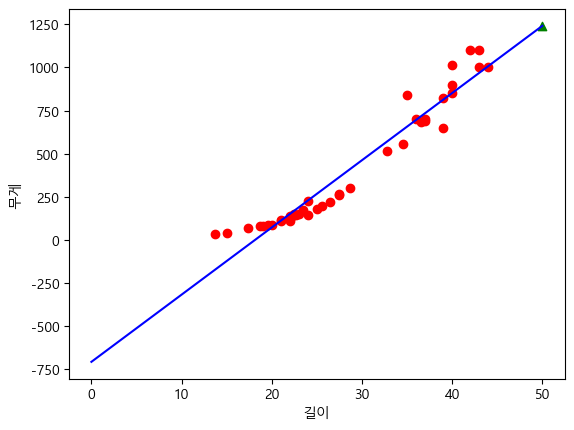

In [15]:
### 추세선 그리기
### 원본 데이터와 임의 데이터 산점도로 시각화하기
# - 원본
plt.scatter(train_input_2d,train_target,c='red', label='원본')
# - 임의 데이터
plt.scatter(50, pred[0], marker='^', c='green', label='임의 데이터')
# - 추세선(기울기, 절편)
plt.plot([0,50],[0*a+b,a*50 +b], c='blue')

plt.xlabel('길이')
plt.ylabel('무게')
plt.show();

#### 해석

- KNN 모델 보다는 좋은 성능을 보이는 모델이다.

- 과대적합이 의심은 되나 일반화 되었다고 판단해도 될 것으로 보임

- 그러나, y절편의 값이 음수(-)의 값으로, 예측 시 0보다 작은 무게를 예측할 수 있는 모델로 여겨짐

- 즉, 0 이하의 '이상치' 데이터를 예측할 수 있음

- 따라서, 단일 회귀모델로는 생선의 길이로 무게를 예측하기에는 적합하지 않은 것으로 판단됨

#### 해결 방법

- 원본의 산점도 그래프를 볼 때 시작 부분이 곡선을 보이고 있음

- 이에, 직선이 아닌 곡선이 적용된 모델로 훈련할 필요성이 있음

### 다항회귀모델 사용하기

- 곡선의 방정식을 사용함

- $`y = ax^2 +bx +c`$

- 독립변수가 2개 사용됨(변수 = 특성)

- 사용모델 : LinearRegression()
    
    - 모든 선형회귀모델(단일,다항,다중 모두 동일)은 같은 모델을 사용함

    - 회귀 모델 구분은 독립 변수의 형태에 따라서 모델이 알아서 결정함

In [16]:
train_input_2d.shape

(42, 1)

In [17]:
### 특성 $`x^2`$값을 생성하여 2개의 특성 생성하기
#- 사용하는 데이터 : train_input_2d, test_input_2d

### 훈련 독립변수에 $x^2$값 생성하여 2열 생성하기
# - column_stack() : 행렬의 생성 함수

train_poly = np.column_stack((train_input_2d**2,train_input_2d))
test_poly = np.column_stack((test_input_2d**2, test_input_2d))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [18]:
# 모델 생성하기
lr=LinearRegression()

# 모델 훈련시키기
lr.fit(train_poly,train_target)

# 훈련 및 테스트 정확도 확인하기
train_score = lr.score(train_poly,train_target)
test_score = lr.score(test_poly, test_target)

print(train_score, test_score)

0.9706807451768623 0.9775935108325121


#### 해석

- 농어의 길이(독립 변수)로 무게(종속 변수)를 예측하는 다항회귀모델을 만들고 있다.

- 훈련 데이터가 테스트 데이터보다 약 0.007 정도 작기 때문에 과소적합이 미세하게 나타나고 있음

- 매우 미세한 차이의 과소적합인 경우에는 그대로 사용해도 무방하지만, 그래도 성능 향상을 고려해 볼 필요성은 있다.

- 해소방법 : 데이터 늘리기, 그대로 사용하기(미세한 경우), 다른 모델 찾아서 적용하기

In [27]:
### 임의의 값 길이 50cm 예측하기
# - 임의 데이터로 예측할 때에도 훈련에 사용된 독립변수의 형태와 같게 해야 한다.

pred = lr.predict([[50**2,50]])
pred

array([1573.98423528])

In [29]:
### 계수(a, b 기울기 및 y절편) 추출하기
# - 기울기
a = lr.coef_[0]
b = lr.coef_[1]

# - y절편
c = lr.intercept_

a,b,c

(1.0143321093767304, -21.557924978837356, 116.05021078278259)

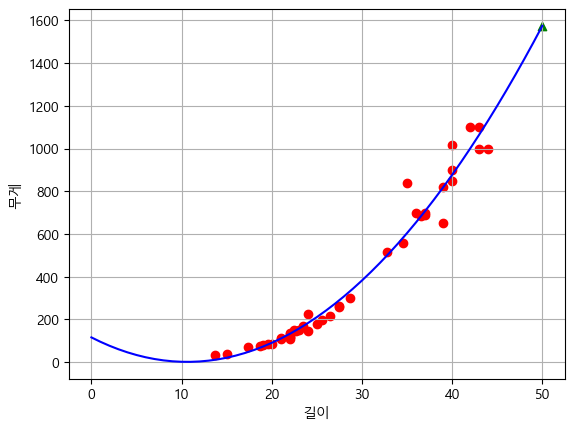

In [36]:
### 추세선 그리기
### 원본 데이터와 임의 데이터 산점도로 시각화하기
# - 원본
plt.scatter(train_input_2d,train_target,c='red', label='원본')
# - 임의 데이터
plt.scatter(50, pred[0], marker='^', c='green', label='임의 데이터')

# - 추세선(기울기, 절편)
# - 곡선의 x축값 범위 생성하기 : 0~50 범위의 리스트
point = np.arange(0,51)
plt.plot(point, a*point**2+b*point+c, c='blue')

plt.grid()
plt.xlabel('길이')
plt.ylabel('무게')
plt.show();

### <다항회귀모델 결론>

- 단일회귀모델에 비하여 음의 값이 나올 수(예측) 있는 부분을 해소함

- 예측 결과 또한 정확한 것으로 판단되는 모델임

- 다만, 과소적합이 미세하게 나타나기에 모델로 사용하기에는 부적합한 부분이 있음

- 해소 가능한 방법

    - 과대/과소적합을 해소할 수 있는 방법으로는 row 데이터를 증가하는 것은 현재 어렵다고 판단되며,
     
    - col(열, 특성) 데이터를 늘리는 방법으로 해볼 수 있음
    
        - 특성을 늘린다는 개념은 빅데이터 공학에서 "특성 공학"이라는 개념을 적용한다.
    
        - 특성을 늘림으로써 모델이 더 복잡하게, 즉 집중력을 가지고 패턴을 찾을 수 있도록 한다.
    
        - 특성을 늘려서 분석하는 모델로는 다중회귀 모델이 있다(단일 회귀의 확장이라고 생각하면 됨).

    - 또 다른 방법

        - 특성을 늘린다는 의미는 집중력, 즉 복잡도를 늘린다는 개념으로 적용된다.

        - 특성이 많을수록 모델이 패턴을 찾기 위해 많은 반복 훈련을 수행한다 -> 이를 복잡도라고 생각하면 된다.

        - 복잡도라는 속성(하이퍼 파라미터)을 이용하여 복잡도를 크게 또는 작게 할 수 있다.

        - 복잡도를 적용한 모델 --> 릿지와 라쏘가 있다.

#### 데이터 용어 정의

- 컬럼 = 특성 = feature

- 일반 데이터베이스 : 컬럼

- 머신 러닝 : 특성

- 딥러닝 : feature